# Лабораторная работа №3

*Соловьев Роман, Халилов Роман М32001*

## Исследуемые квадратичные функции:

$F1 = x^{2} + 2y^{2} - xy - 8y + 1$ - минимум в точке u = (8/7, 16/7), F1(u) = -57/7

$F2 = x^{2} + y^{2} + 0.5xy + 3x + 2y$ - минимум в точке u = (-4/3, -2/3), F1(u) = -8/3

$F3 = 3x^{2} + 4y^{2} + 4x + 3y - 12$ - минимум в точке u = (-2/3, -3/8), F1(u) = -667/48

In [86]:
import matplotlib.pyplot as plt
import numpy as np

class F:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

    def __call__(self, x):
        return x.T @ self.a @ x + self.b.T @ x + self.c

    def grad(self, x):
        return 2 * self.a @ x + self.b

### F1

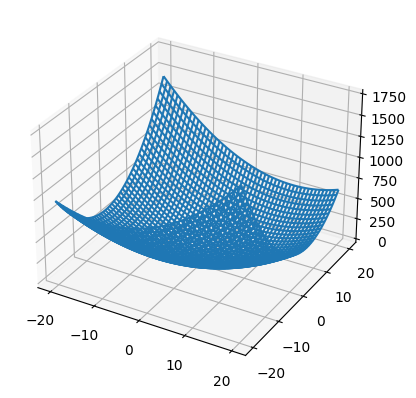

In [87]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x, y = np.mgrid[-20:20:50j, -20:20:50j]

F1 = x**2 + 2*(y**2) - x*y - 8*y + 1
ax.plot_wireframe(x, y, F1)

f1 = F(np.array([[1, -0.5], [-0.5, 2]]), np.array([0, -8]), np.array(1))

plt.show()

### F2

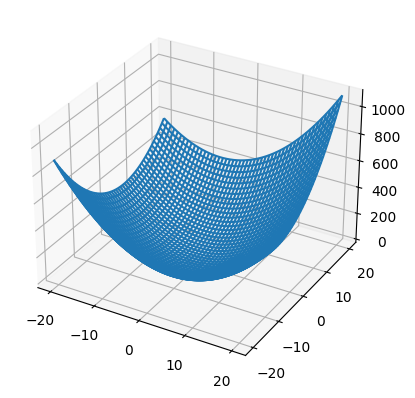

In [88]:
fig2 = plt.figure()
ax = fig2.add_subplot(projection='3d')

x, y = np.mgrid[-20:20:50j, -20:20:50j]

F2 = x**2 + y**2 + 0.5*x*y + 3*x + 2*y
ax.plot_wireframe(x, y, F2)

f2 = F(np.array([[1, 0.25], [0.25, 1]]), np.array([3, 2]), np.array(0))

plt.show()

### F3

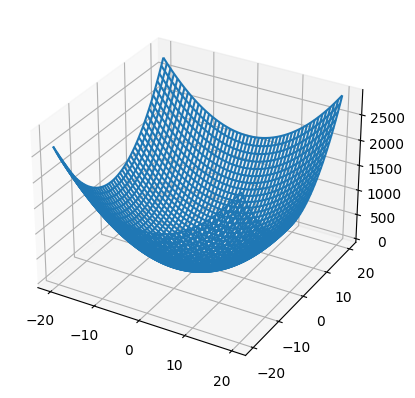

In [89]:
fig3 = plt.figure()
ax = fig3.add_subplot(projection='3d')

x, y = np.mgrid[-20:20:50j, -20:20:50j]

F3 = 3*x**2 + 4*y**2 + 4*x + 3*y - 12
ax.plot_wireframe(x, y, F3)

f3 = F(np.array([[3, 0], [0, 4]]), np.array([4, 3]), np.array(-12))

plt.show()

## Методы спуска

### Градиентный спуск с постоянным шагом

In [90]:
def grad_desc(f: F, x0, l, eps, max_i):
    position = []
    function = []
    position.append(x0)
    function.append(f(x0))
    for i in range(1, max_i + 1):
        grad = f.grad(x0)
        x0 = x0 - l * grad
        position.append(x0)
        function.append(f(x0))
        if np.max(np.abs(grad)) < eps:
            break

    return [position, function]

### Спуск с дроблением шага по условию Армихо

In [91]:
def grad_desc_Armijo(f: F, x0, eps, max_i):
    position = []
    function = []
    position.append(x0)
    function.append(f(x0))
    for i in range(1, max_i + 1):
        grad = f.grad(x0)
        l = 1
        while f(x0 - l * grad) > f(x0) - 0.1 * l * np.mean(grad)**2:
            l *= 0.5
        x0 = x0 - l * grad
        position.append(x0)
        function.append(f(x0))
        if np.max(np.abs(grad)) < eps:
            break

    return [position, function]

### Метод наискорейшего спуска (___ оптимизация)

In [92]:
def grad_desc_with_GSM(f: F, x0, eps, max_i):

    def golden_section_method(f, a, b, eps):
        l = b - a
        a_i = a
        b_i = b
        Func = (np.sqrt(5)+1)/2
        x1 = b - l/Func
        x2 = a + l/Func
        func_x1 = f(x1)
        func_x2 = f(x2)
        key = 0

        while l >= eps:
            x1 = b_i - l/Func
            x2 = a_i + l/Func
        
            if key == 1:   
                func_x1 = f(x1)
            if key == 2:   
                func_x2 = f(x2)

            if func_x1 <= func_x2:
                b_i = x2
                func_x2 = func_x1
                key = 1
            if func_x1 > func_x2:
                a_i = x1
                func_x1 = func_x2
                key = 2

            l = b_i - a_i

        return (a_i+b_i)/2


    position = []
    function = []
    position.append(x0)
    function.append(f(x0))
    for i in range(1, max_i + 1):
        grad = f.grad(x0)
        l = golden_section_method(lambda x: f(x0 - x * grad), 0, 1, eps)
        x0 = x0 - l * grad
        position.append(x0)
        function.append(f(x0))
        if np.max(np.abs(grad)) < eps:
            break

    return [position, function]

### Метод сопряженных градиентов

In [93]:
def grad_conjugate(f: F, x0, l, eps, max_i):
    position = []
    function = []
    position.append(x0)
    function.append(f(x0))
    r = -f.grad(x0) / 2
    d = r.copy()
    for i in range(1, max_i + 1):
        Ad = f.a @ d
        a = r @ r / (d @ Ad)
        x0 = x0 + a * d * l
        position.append(x0)
        function.append(f(x0))
        r_new = r - a * Ad * l
        if np.max(np.abs(r_new)) < eps:
            break
        betta = (r_new @ r_new) / (r @ r)
        d = r_new + betta * d
        r = r_new.copy()

    return [position, function]

## Тест методов на заготовленных функциях

### Тест количества итераций с одинаковой случайной точкой начала

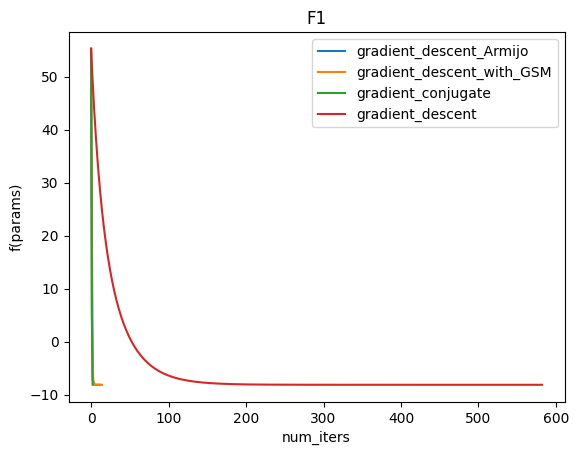

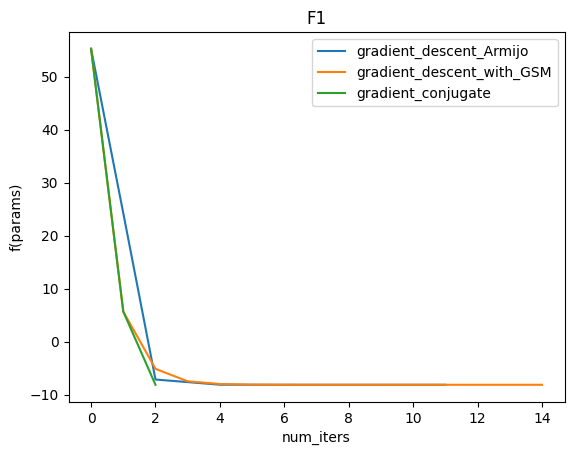

In [94]:
x0 = (np.random.randn(2) - 0.5) * 5

plt.plot(grad_desc_Armijo(f1, x0, 0.001, 100)[1], label="gradient_descent_Armijo")
plt.plot(grad_desc_with_GSM(f1, x0, 0.001, 100)[1], label="gradient_descent_with_GSM")
plt.plot(grad_conjugate(f1, x0, 1, 0.001, 100)[1], label="gradient_conjugate")
plt.plot(grad_desc(f1, x0, 0.01, 0.001, 1000)[1], label="gradient_descent")

plt.legend()
plt.title("F1")
plt.xlabel("num_iters")
plt.ylabel("f(params)")
plt.show()

plt.plot(grad_desc_Armijo(f1, x0, 0.001, 100)[1], label="gradient_descent_Armijo")
plt.plot(grad_desc_with_GSM(f1, x0, 0.001, 100)[1], label="gradient_descent_with_GSM")
plt.plot(grad_conjugate(f1, x0, 1, 0.001, 100)[1], label="gradient_conjugate")

plt.legend()
plt.title("F1")
plt.xlabel("num_iters")
plt.ylabel("f(params)")
plt.show()

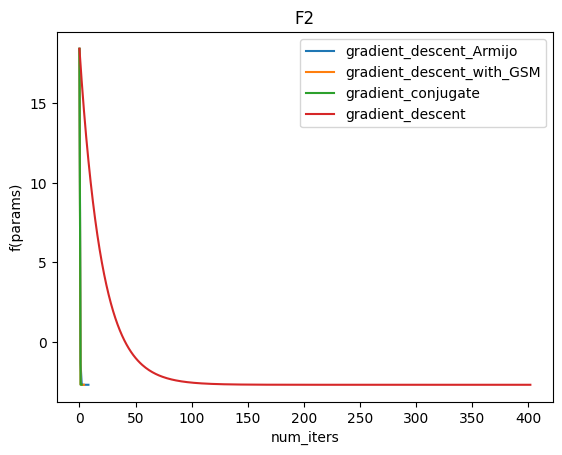

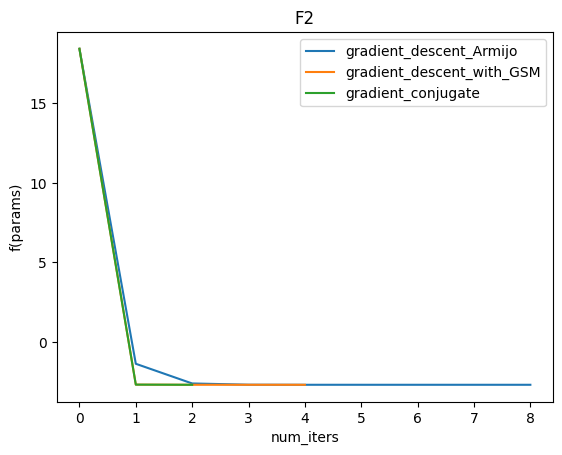

In [95]:
plt.plot(grad_desc_Armijo(f2, x0, 0.001, 100)[1], label="gradient_descent_Armijo")
plt.plot(grad_desc_with_GSM(f2, x0, 0.001, 100)[1], label="gradient_descent_with_GSM")
plt.plot(grad_conjugate(f2, x0, 1, 0.001, 100)[1], label="gradient_conjugate")
plt.plot(grad_desc(f2, x0, 0.01, 0.001, 1000)[1], label="gradient_descent")

plt.legend()
plt.title("F2")
plt.xlabel("num_iters")
plt.ylabel("f(params)")
plt.show()

plt.plot(grad_desc_Armijo(f2, x0, 0.001, 100)[1], label="gradient_descent_Armijo")
plt.plot(grad_desc_with_GSM(f2, x0, 0.001, 100)[1], label="gradient_descent_with_GSM")
plt.plot(grad_conjugate(f2, x0, 1, 0.001, 100)[1], label="gradient_conjugate")

plt.legend()
plt.title("F2")
plt.xlabel("num_iters")
plt.ylabel("f(params)")
plt.show()

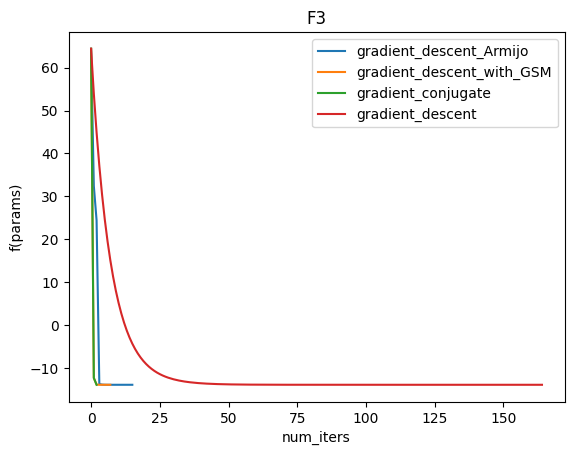

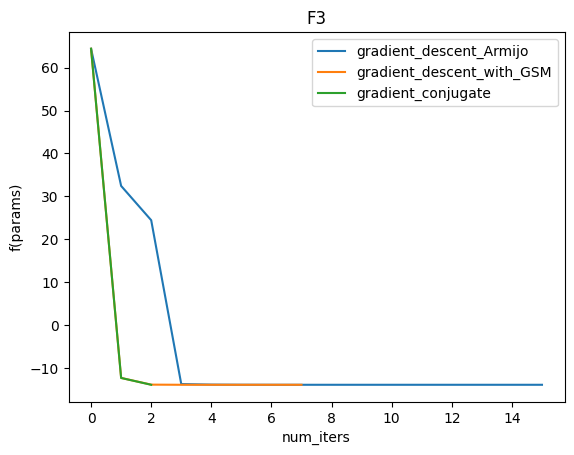

In [96]:
plt.plot(grad_desc_Armijo(f3, x0, 0.001, 100)[1], label="gradient_descent_Armijo")
plt.plot(grad_desc_with_GSM(f3, x0, 0.001, 100)[1], label="gradient_descent_with_GSM")
plt.plot(grad_conjugate(f3, x0, 1, 0.001, 100)[1], label="gradient_conjugate")
plt.plot(grad_desc(f3, x0, 0.01, 0.001, 1000)[1], label="gradient_descent")

plt.legend()
plt.title("F3")
plt.xlabel("num_iters")
plt.ylabel("f(params)")
plt.show()

plt.plot(grad_desc_Armijo(f3, x0, 0.001, 100)[1], label="gradient_descent_Armijo")
plt.plot(grad_desc_with_GSM(f3, x0, 0.001, 100)[1], label="gradient_descent_with_GSM")
plt.plot(grad_conjugate(f3, x0, 1, 0.001, 100)[1], label="gradient_conjugate")

plt.legend()
plt.title("F3")
plt.xlabel("num_iters")
plt.ylabel("f(params)")
plt.show()

### Траектории методов с той же точкой начала

#### F1:

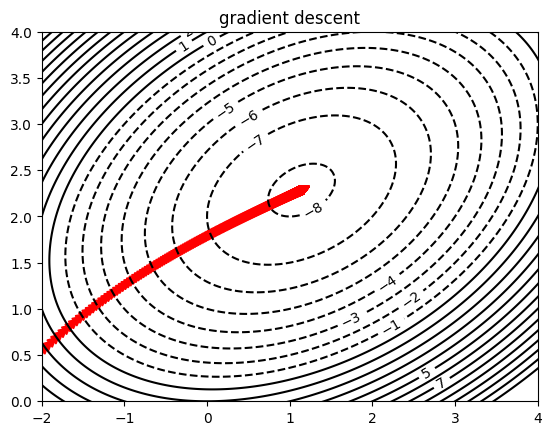

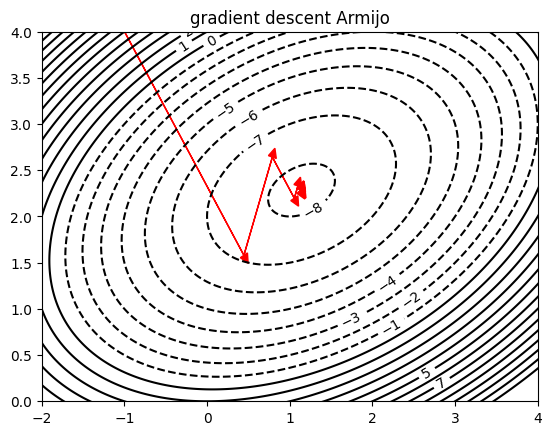

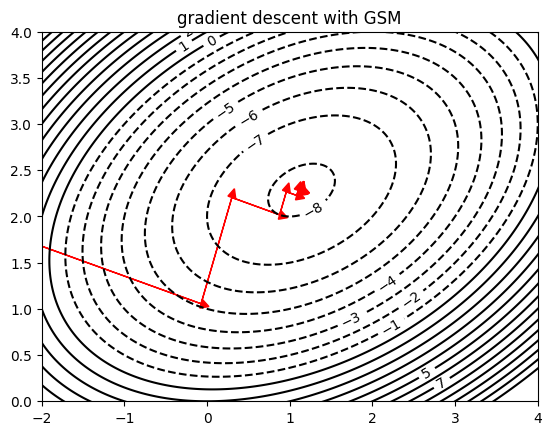

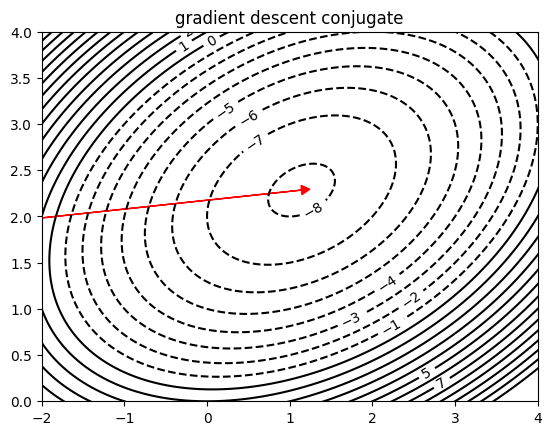

In [97]:
fig, ax = plt.subplots()

charge_value = -8
levels = np.arange(-8, 14, 1)
ax.set_xlim(-2, 4)
ax.set_ylim(-0, 4)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = x_1**2 + 2*(y_1**2) - x_1*y_1 - 8*y_1 + 1

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)

history1 = grad_desc(f1, x0, 0.01, 0.001, 1000)[0]

x1, y1 = [i[0] for i in history1], [i[1] for i in history1]
for i in range(len(x1) - 1):
    ax.arrow(x1[i], y1[i], x1[i + 1] - x1[i], y1[i + 1] - y1[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent")
plt.show()



fig, ax = plt.subplots()

charge_value = -8
levels = np.arange(-8, 14, 1)
ax.set_xlim(-2, 4)
ax.set_ylim(-0, 4)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = x_1**2 + 2*(y_1**2) - x_1*y_1 - 8*y_1 + 1

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)

history2 = grad_desc_Armijo(f1, x0, 0.001, 1000)[0]

x2, y2 = [i[0] for i in history2], [i[1] for i in history2]
for i in range(len(x2) - 1):
    ax.arrow(x2[i], y2[i], x2[i + 1] - x2[i], y2[i + 1] - y2[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent Armijo")
plt.show()



fig, ax = plt.subplots()

charge_value = -8
levels = np.arange(-8, 14, 1)
ax.set_xlim(-2, 4)
ax.set_ylim(-0, 4)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = x_1**2 + 2*(y_1**2) - x_1*y_1 - 8*y_1 + 1

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)


history3 = grad_desc_with_GSM(f1, x0, 0.001, 1000)[0]

x3, y3 = [i[0] for i in history3], [i[1] for i in history3]
for i in range(len(x3) - 1):
    ax.arrow(x3[i], y3[i], x3[i + 1] - x3[i], y3[i + 1] - y3[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent with GSM")
plt.show()


fig, ax = plt.subplots()

charge_value = -8
levels = np.arange(-8, 14, 1)
ax.set_xlim(-2, 4)
ax.set_ylim(-0, 4)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = x_1**2 + 2*(y_1**2) - x_1*y_1 - 8*y_1 + 1

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)

history4 = grad_conjugate(f1, x0, 1, 0.001, 1000)[0]

x4, y4 = [i[0] for i in history4], [i[1] for i in history4]
for i in range(len(x4) - 1):
    ax.arrow(x4[i], y4[i], x4[i + 1] - x4[i], y4[i + 1] - y4[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent conjugate")
plt.show()

#### F2:

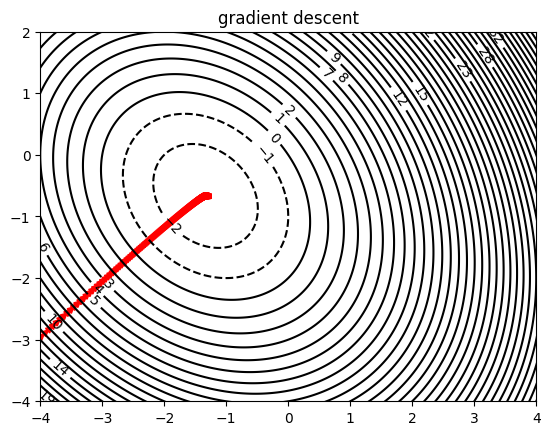

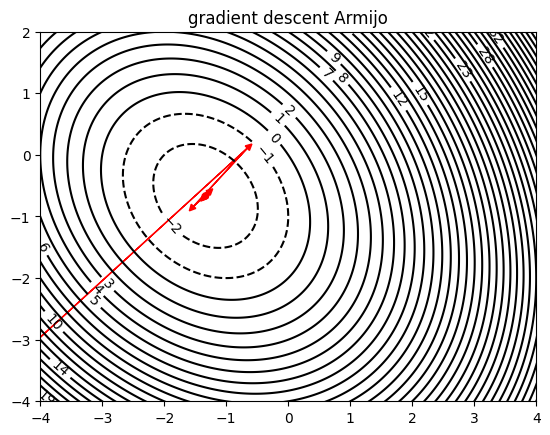

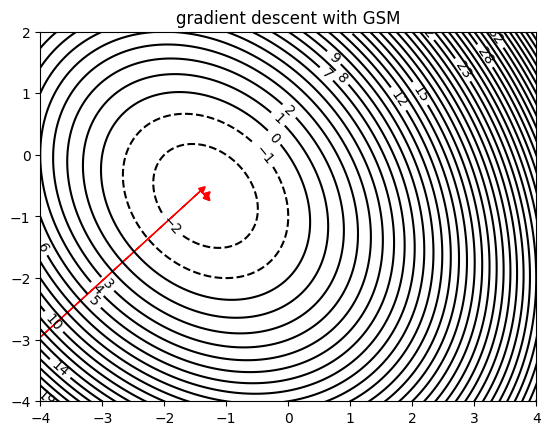

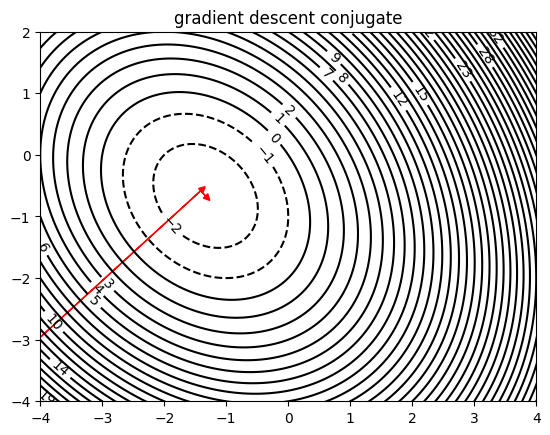

In [98]:
fig, ax = plt.subplots()

levels = np.arange(-2, 40, 1)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 2)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = x_1**2 + y_1**2 + 0.5*x_1*y_1 + 3*x_1 + 2*y_1

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)

history1 = grad_desc(f2, x0, 0.01, 0.001, 1000)[0]

x1, y1 = [i[0] for i in history1], [i[1] for i in history1]
for i in range(len(x1) - 1):
    ax.arrow(x1[i], y1[i], x1[i + 1] - x1[i], y1[i + 1] - y1[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent")
plt.show()



fig, ax = plt.subplots()

levels = np.arange(-2, 40, 1)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 2)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = x_1**2 + y_1**2 + 0.5*x_1*y_1 + 3*x_1 + 2*y_1

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)
history2 = grad_desc_Armijo(f2, x0, 0.001, 1000)[0]

x2, y2 = [i[0] for i in history2], [i[1] for i in history2]
for i in range(len(x2) - 1):
    ax.arrow(x2[i], y2[i], x2[i + 1] - x2[i], y2[i + 1] - y2[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent Armijo")
plt.show()



fig, ax = plt.subplots()

levels = np.arange(-2, 40, 1)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 2)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = x_1**2 + y_1**2 + 0.5*x_1*y_1 + 3*x_1 + 2*y_1

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)

history3 = grad_desc_with_GSM(f2, x0, 0.001, 1000)[0]

x3, y3 = [i[0] for i in history3], [i[1] for i in history3]
for i in range(len(x3) - 1):
    ax.arrow(x3[i], y3[i], x3[i + 1] - x3[i], y3[i + 1] - y3[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent with GSM")
plt.show()


fig, ax = plt.subplots()

levels = np.arange(-2, 40, 1)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 2)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = x_1**2 + y_1**2 + 0.5*x_1*y_1 + 3*x_1 + 2*y_1

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)
history4 = grad_conjugate(f2, x0, 1, 0.001, 1000)[0]

x4, y4 = [i[0] for i in history4], [i[1] for i in history4]
for i in range(len(x4) - 1):
    ax.arrow(x4[i], y4[i], x4[i + 1] - x4[i], y4[i + 1] - y4[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent conjugate")
plt.show()

#### F3:

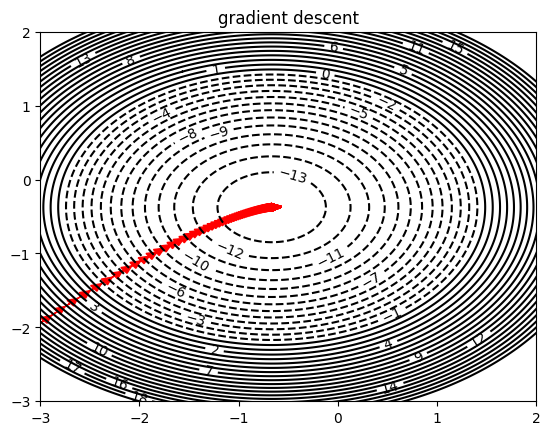

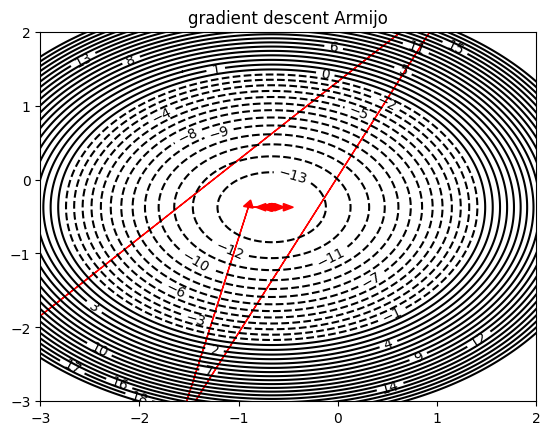

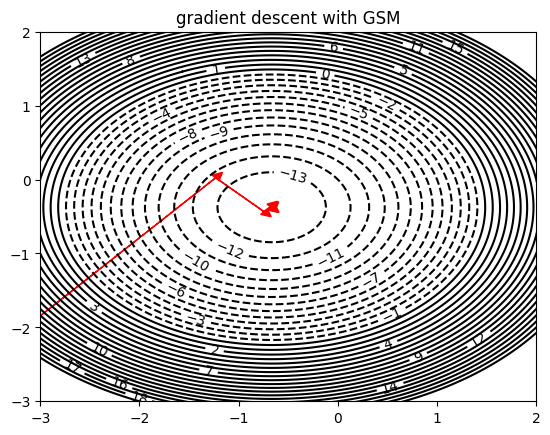

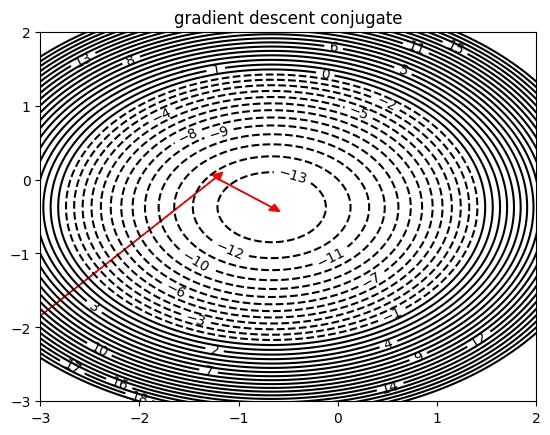

In [99]:
fig, ax = plt.subplots()

levels = np.arange(-13, 20, 1)  
ax.set_xlim(-3, 2)
ax.set_ylim(-3, 2)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = 3*x_1**2 + 4*y_1**2 + 4*x_1 + 3*y_1 - 12

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)
  

history1 = grad_desc(f3, x0, 0.01, 0.001, 1000)[0]

x1, y1 = [i[0] for i in history1], [i[1] for i in history1]
for i in range(len(x1) - 1):
    ax.arrow(x1[i], y1[i], x1[i + 1] - x1[i], y1[i + 1] - y1[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent")
plt.show()



fig, ax = plt.subplots()

levels = np.arange(-13, 20, 1)  
ax.set_xlim(-3, 2)
ax.set_ylim(-3, 2)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = 3*x_1**2 + 4*y_1**2 + 4*x_1 + 3*y_1 - 12

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)
  

history2 = grad_desc_Armijo(f3, x0, 0.001, 1000)[0]

x2, y2 = [i[0] for i in history2], [i[1] for i in history2]
for i in range(len(x2) - 1):
    ax.arrow(x2[i], y2[i], x2[i + 1] - x2[i], y2[i + 1] - y2[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent Armijo")
plt.show()


fig, ax = plt.subplots()

levels = np.arange(-13, 20, 1)  
ax.set_xlim(-3, 2)
ax.set_ylim(-3, 2)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = 3*x_1**2 + 4*y_1**2 + 4*x_1 + 3*y_1 - 12

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)
  

history3 = grad_desc_with_GSM(f3, x0, 0.001, 1000)[0]

x3, y3 = [i[0] for i in history3], [i[1] for i in history3]
for i in range(len(x3) - 1):
    ax.arrow(x3[i], y3[i], x3[i + 1] - x3[i], y3[i + 1] - y3[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent with GSM")
plt.show()


fig, ax = plt.subplots()
levels = np.arange(-13, 20, 1)  
ax.set_xlim(-3, 2)
ax.set_ylim(-3, 2)

X11 = np.linspace(-6, 6, 1000)
Y11 = np.linspace(-6, 6, 1000)
x_1, y_1 = np.meshgrid(X11, Y11)
Z11 = 3*x_1**2 + 4*y_1**2 + 4*x_1 + 3*y_1 - 12

contour_plot = ax.contour(
                x_1,
                y_1,
                Z11,
                levels=levels,
                colors=('black'),
                corner_mask=True
            )
ax.clabel(contour_plot, inline=1, fontsize=10)
  

history4 = grad_conjugate(f3, x0, 1, 0.001, 1000)[0]

x4, y4 = [i[0] for i in history4], [i[1] for i in history4]
for i in range(len(x4) - 1):
    ax.arrow(x4[i], y4[i], x4[i + 1] - x4[i], y4[i + 1] - y4[i], color="red", head_width=0.1, head_length=0.1)
    
plt.title("gradient descent conjugate")
plt.show()

### Количество итераций для каждого метода от расстояния до начальной точки

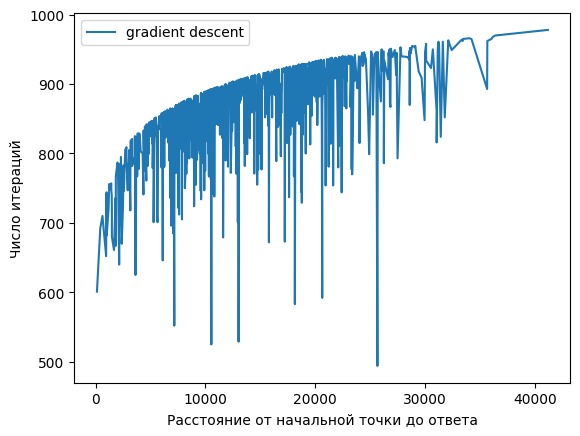

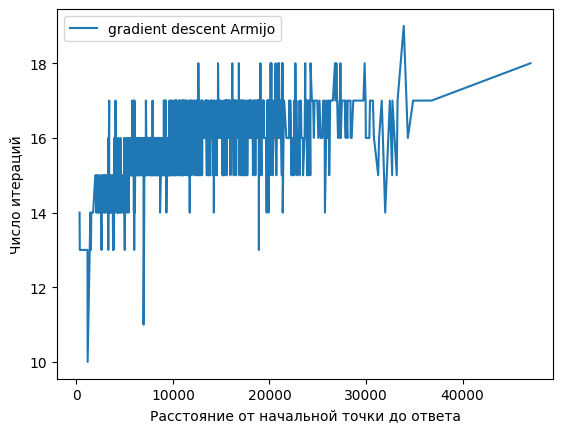

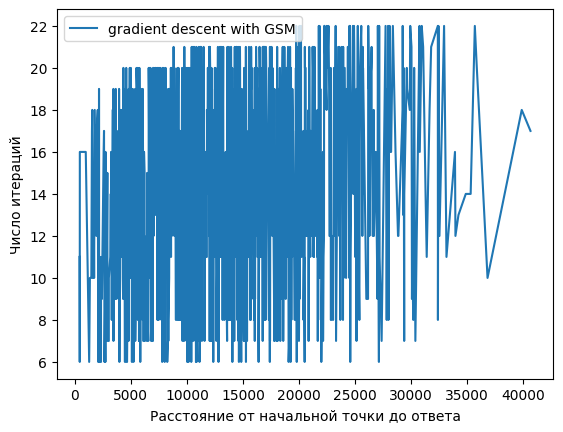

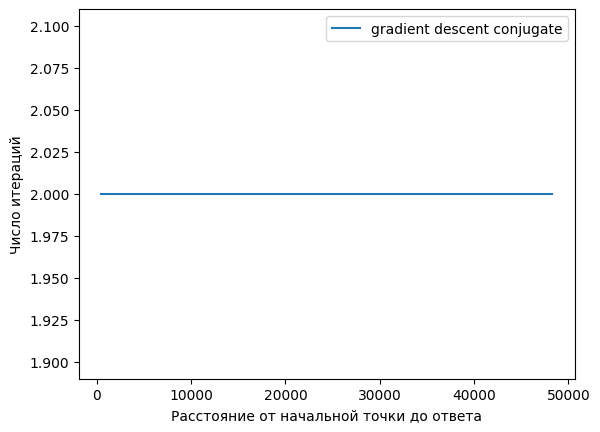

In [100]:
answer = np.array([8/7, 16/7])
x, y = [], []
for j in np.zeros(1000):
    start = (np.random.randn(2) - 0.5) * 10000

    result = grad_desc(f1, start, 0.01, 0.01, 1000)
    num_iters = len(result[1]) - 1
    x.append(np.sum(np.power(start - answer, 2))**0.5)
    y.append(num_iters)

s = sorted(list(zip(x, y)), key=lambda x: x[0])
x, y = [i[0] for i in s], [i[1] for i in s]
plt.plot(x, y, label="gradient descent")
plt.xlabel("Расстояние от начальной точки до ответа")
plt.ylabel("Число итераций")
plt.legend()
plt.show()

answer = np.array([8/7, 16/7])
x, y = [], []
for j in np.zeros(1000):
    start = (np.random.randn(2) - 0.5) * 10000

    result = grad_desc_Armijo(f1, start, 0.01, 1000)
    num_iters = len(result[1]) - 1
    x.append(np.sum(np.power(start - answer, 2))**0.5)
    y.append(num_iters)

s = sorted(list(zip(x, y)), key=lambda x: x[0])
x, y = [i[0] for i in s], [i[1] for i in s]
plt.plot(x, y, label="gradient descent Armijo")
plt.xlabel("Расстояние от начальной точки до ответа")
plt.ylabel("Число итераций")
plt.legend()
plt.show()

answer = np.array([8/7, 16/7])
x, y = [], []
for j in np.zeros(1000):
    start = (np.random.randn(2) - 0.5) * 10000

    result = grad_desc_with_GSM(f1, start, 0.01, 1000)
    num_iters = len(result[1]) - 1
    x.append(np.sum(np.power(start - answer, 2))**0.5)
    y.append(num_iters)

s = sorted(list(zip(x, y)), key=lambda x: x[0])
x, y = [i[0] for i in s], [i[1] for i in s]
plt.plot(x, y, label="gradient descent with GSM")
plt.xlabel("Расстояние от начальной точки до ответа")
plt.ylabel("Число итераций")
plt.legend()
plt.show()

answer = np.array([8/7, 16/7])
x, y = [], []
for j in np.zeros(1000):
    start = (np.random.randn(2) - 0.5) * 10000

    result = grad_conjugate(f1, start, 1, 0.01, 1000)
    num_iters = len(result[1]) - 1
    x.append(np.sum(np.power(start - answer, 2))**0.5)
    y.append(num_iters)

s = sorted(list(zip(x, y)), key=lambda x: x[0])
x, y = [i[0] for i in s], [i[1] for i in s]
plt.plot(x, y, label="gradient descent conjugate")
plt.xlabel("Расстояние от начальной точки до ответа")
plt.ylabel("Число итераций")
plt.legend()
plt.show()

## Генератор квадратичных функций


### Сам генератор

In [101]:
def func_generator(n, k):
    min_value = np.random.rand(1)
    max_value = min_value * k
    d = max_value - min_value
    a = (np.ones((n, n)) * min_value + np.random.rand(n, n) * d) * np.tri(n, k=0)
    b = -(np.ones((n)) * min_value + np.random.rand(n) * d)
    c = np.random.rand(1)
    
    return F(a, b, c)

### Тест генератора на градиентном спуске

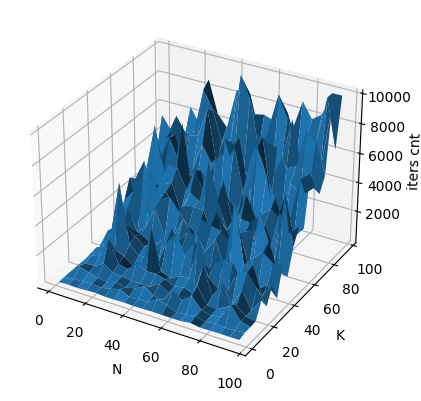

In [102]:
x = np.arange(1, 100, 5)
y = np.arange(1, 100, 5)
X, Y = np.meshgrid(x, y)
Z = Y.copy()
for n_i, n in enumerate(range(2, 100, 5)):
    for k_i, k in enumerate(range(1, 100, 5)):
        for t in range(5):
            f = func_generator(n, k) 
            x0 = np.random.rand(n)
            result = grad_desc(f, x0, 0.01, 1, 10000)
            iters = len(result[1]) - 1
            Z[n_i, k_i] = (Z[n_i, k_i] + iters)
            if t == 4:
                Z[n_i, k_i] = Z[n_i, k_i] / 5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('N')
ax.set_ylabel('K')
ax.set_zlabel('iters cnt')

ax.plot_surface(X, Y, Z)
plt.show()